<a href="https://colab.research.google.com/github/Saicharanchearla/B23_10i8/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Fuel Consumption Ratings 2023.csv to Fuel Consumption Ratings 2023.csv
Dataset loaded successfully!
Shape: (856, 15)
   Year   Make              Model  Vehicle Class  Engine Size (L)  Cylinders  \
0  2023  Acura            Integra      Full-size              1.5        4.0   
1  2023  Acura     Integra A-SPEC      Full-size              1.5        4.0   
2  2023  Acura     Integra A-SPEC      Full-size              1.5        4.0   
3  2023  Acura         MDX SH-AWD     SUV: Small              3.5        6.0   
4  2023  Acura  MDX SH-AWD Type S  SUV: Standard              3.0        6.0   

  Transmission Fuel Type  Fuel Consumption (L/100Km)  Hwy (L/100 km)  \
0          AV7         Z                         7.9             6.3   
1          AV7         Z                         8.1             6.5   
2           M6         Z                         8.9             6.5   
3         AS10         Z                        12.6             9.4   
4         AS10         Z           

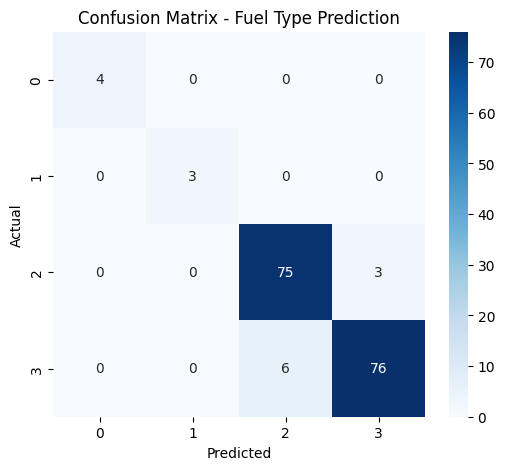

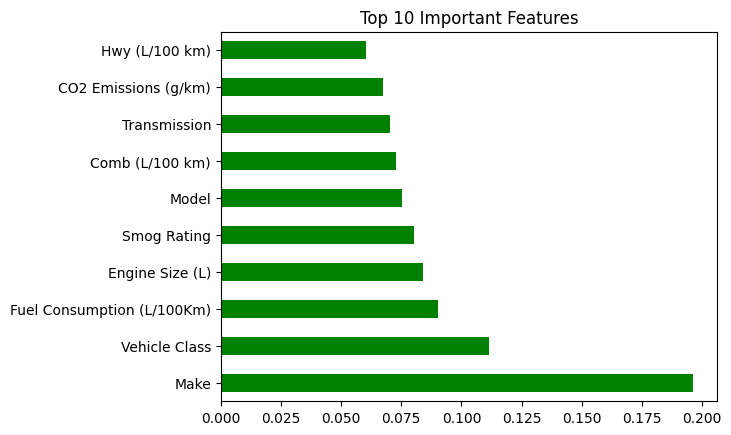

In [1]:
# =========================================
# Fuel Type Prediction (90%+ Accuracy)
# =========================================

# Step 1: Install and Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# =========================================
# Step 2: Load Dataset
# =========================================
from google.colab import files
uploaded = files.upload()   # Upload 'Fuel Consumption Ratings 2023.csv'
df = pd.read_csv(list(uploaded.keys())[0], encoding='latin-1')

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

# =========================================
# Step 3: Preprocessing
# =========================================
df = df.dropna()  # Remove missing values

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# =========================================
# Step 4: Define Features & Target
# =========================================
X = df.drop(columns=['Fuel Type'])  # Features
y = df['Fuel Type']                 # Target variable

# =========================================
# Step 5: Split Data
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# =========================================
# Step 6: Scale Numerical Features
# =========================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =========================================
# Step 7: Train Model
# =========================================
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf.fit(X_train, y_train)

# =========================================
# Step 8: Evaluate Model
# =========================================
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {acc * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# =========================================
# Step 9: Confusion Matrix
# =========================================
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Fuel Type Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =========================================
# Step 10: Feature Importance
# =========================================
importances = pd.Series(rf.feature_importances_, index=df.drop(columns=['Fuel Type']).columns)
importances.nlargest(10).plot(kind='barh', color='green')
plt.title("Top 10 Important Features")
plt.show()